# Panorama do Sáude Pública

## 1. Introdução
Este relatório tem como objetivo, além de servir como experiência prática, trazer uma breve análise da saúde pública e sua atuação em território brasileiro. Em um primeiro momento será feita uma análise das Unidades Básicas de Saúde(UBS) e, na parte final, uma análise dos repasses feitos para a saúde. Os dados foram obtidos de fontes oficiais do governo e servem para uma simples consulta e análise superficial, **o intuito não é ser uma documento oficial ou representativo de qualquer órgão ou entidade governamental, sendo apenas para conhecimento pessoal e prático da biblioteca Pandas e demais com a linguagem Python**.

## 2. Importação dos pacotes e bibliotecas
Para o estudo, serão utilizadas as bibliotecas Matplotlib, Pandas e numpy, além da biblioteca Tabula que será utilizada para ler os arquivos em formato .pdf.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tabula

## 3. Leitura inicial de arquivo
Como mencionado, primeiramente será estudado a distribuição das Unidades Básicas de Saúde(UBS) em todo o território brasileiro. O arquivo em formato .csv foi obtido da base de dados aberta do governo federal, e atualizado dia 21/07/2021, pelo site https://dados.gov.br/dataset/unidades-basicas-de-saude-ubs

In [2]:
df = pd.read_csv('cadastro_estabelecimentos_cnes.csv', sep=";")
df

,CNES,UF,IBGE,NOME,LOGRADOURO,BAIRRO,LATITUDE,LONGITUDE
0,33820,52,520170,UNIDADE DE SAUDE DA FAMILIA PSF 307,RUA H,NOVO MUNDO,"-15,90682","-52,22545"
1,108,26,260290,USF ALTO DOS INDIOS,RUA 17,PONTE DOS CARVALHOS,"-8,28389","-35,0321"
2,116,26,260290,USF CHARNECA II,RUA 02,CHARNECA,"-8,28353","-35,02819"
3,124,26,260290,USF SAO FRANCISCO I,RUA MANOEL DOMINGOS BARROS,SAO FRANCISCO,"-8,287","-35,035"
4,132,26,260290,USF ROSARIO,RUA 01,ROSARIO,"-8,28389","-35,0321"
...,...,...,...,...,...,...,...,...
41812,9718907,23,230780,JOAO ARISTON DIAS,SAO GERALDO,SAO GERALDO,"-3,12156","-40,06244"
41813,9773274,33,330330,ESTETIC DENTE,RUA GAVIAO PEIXOTO,ICARAI,"-22,90744","-43,10604"
41814,9776737,35,353320,UBS RACLE BARRETO DA SILVA,RUA JOAQUIM SERAFIM DE FREITAS,MORADA DO TREVO,"-21,1123","-51,49013"
41815,9842330,24,241290,UNIDADE POTENGI,RUA AUGUSTO SEVERO,CENTRO,"-5,97503","-36,07464"


# 4. Tratamento incial do arquivo
Os dados relacionados às unidades federativas estão em representadas por códigos, padrão seguindo o [IBGE](https://desenvolvedores.migrate.info/2019/05/10/tabela-de-codigos-ibge-de-uf-e-municipios/). Sendo necessário substituir seus valores em códigos pelas respectivas unidades federativas correspondentes.

In [3]:
df.dtypes

CNES           int64
UF             int64
IBGE           int64
NOME          object
LOGRADOURO    object
BAIRRO        object
LATITUDE      object
LONGITUDE     object
dtype: object

Como o campo 'UF' está em formato númerico, devido aos códigos, será necessário sua conversão para formato string onde será feita sua substituição pela sigla correspondente.

In [4]:
df['UF'] = df['UF'].apply(str)

In [5]:
df.dtypes

CNES           int64
UF            object
IBGE           int64
NOME          object
LOGRADOURO    object
BAIRRO        object
LATITUDE      object
LONGITUDE     object
dtype: object

In [6]:
#A substituição será feita com auxílio de um dicionário para facilitar a execução da função replace do Python.
substituicoes= {
    "11":"RO",
    "12":"AC",
    "13":"AM",
    "14":"RR",
    "15":"PA",
    "16":"AP",
    "17":"TO",
    "21":"MA",
    "22":"PI",
    "23":"CE",
    "24":"RN",
    "25":"PB",
    "26":"PE",
    "27":"AL",
    "28":"SE",
    "29":"BA",
    "31":"MG",
    "32":"ES",
    "33":"RJ",
    "35":"SP",
    "41":"PR",
    "42":"SC",
    "43":"RS",
    "50":"MS",
    "51":"MT",
    "52":"GO",
    "53":"DF",
}
df['UF'].replace(substituicoes, inplace=True)

Após fazer as devidas trocas, podemos agrupar a quantidade de UBS, em ordem alfabética das siglas, por estado com o uso da função 'aggregate' com argumento 'count'.

In [7]:
grupo_uf = df.groupby('UF')['UF'].agg(UBS='count')

In [8]:
grupo_uf.sort_values(by='UF')

,UBS
UF,
AC,246
AL,904
AM,591
AP,125
BA,3908
CE,2179
DF,201
ES,868
GO,1423


Criando uma varáivel que receberá a tabela em ordem decrescente.

In [9]:
ubs_decrescente = grupo_uf.sort_values(by='UBS', ascending=False)

In [10]:
ubs_decrescente

,UBS
UF,
MG,5560
SP,5328
BA,3908
PE,2496
CE,2179
RS,2093
PR,2088
MA,2003
RJ,1988


Agora será feito um gráfico dessa última variável para exibição de resultados.

Text(0.5, 1.0, 'Distribuiçãos de UBS por estado')

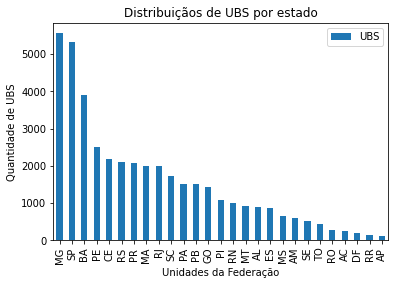

In [11]:
ubs_decrescente.plot.bar()
plt.xlabel('Unidades da Federação')
plt.ylabel('Quantidade de UBS')
plt.title('Distribuiçãos de UBS por estado')

# 5. Análise inicial

### Distribuição de UBS
Com os resultados obtidos, podemos ver que a distribuição é bastante heterogênea ao longo do território nacional, um dos principais motivos se deve à sua densidade demográfica ao longo do território, esperando que estados com maior concentração de habitantes ou extensão territorial necessitem de uma maior disponibilidade de UBS. No gráfico é possível ver que os estados de Minas Gerais, São Paulo e Bahia concentram a maior quantidade de UBS, enquanto o Distrito Federal e os estados de Roraima e Amapá possuem a menor quantidade de UBS. 

### Imprecisão dos dados e mais tabelas
Infelizmente os dados mais recentes do Censo estão desatualizados desde 2010, então a análise não está tão precisa pois serão usadas projeções para [2020](https://www.in.gov.br/en/web/dou/-/portaria-n-pr-254-de-25-de-agosto-de-2020-274382852) do IBGE. Como a página não permite exportar as informações, foi necessário o uso de uma [extensão](https://github.com/arktiv/table-csv-chrome) que permite fazer download de tabelas HTML para formato .csv, conseguindo obter um arquivo para leitura.

In [12]:
tabelas_estado_pop = pd.read_csv('populacao.csv', sep=",")
tabelas_estado_pop

,ORDEM,UNIDADES DA FEDERAÇÃO,POPULAÇÃO
0,0,Brasil,211.755.692
1,1,Rondônia,1.796.460
2,2,Acre,894.470
3,3,Amazonas,4.207.714
4,4,Roraima,631.181
5,5,Pará,8.690.745
6,6,Amapá,861.773
7,7,Tocantins,1.590.248
8,8,Maranhão,7.114.598
9,9,Piauí,3.281.480


Removendo a linha com a população total do Brasil e a coluna 'Ordem', e adicionando manualmente uma coluna da quantidade de UBS por estado para facilitar a análise, ficamos com:

In [13]:
tabelas_estado_pop.drop(index=0, inplace = True)
tabelas_estado_pop.reset_index(drop=True)
tabelas_estado_pop.drop(['ORDEM'],axis=1,inplace=True)
tabelas_estado_pop.reset_index(drop=True)
tabelas_estado_pop['UNIDADES DA FEDERAÇÃO'] = tabelas_estado_pop['UNIDADES DA FEDERAÇÃO'].apply(str)
tabelas_estado_pop = tabelas_estado_pop.sort_values(by='UNIDADES DA FEDERAÇÃO', ascending=True)
tabelas_estado_pop

,UNIDADES DA FEDERAÇÃO,POPULAÇÃO
2,Acre,894.470
14,Alagoas,3.351.543
6,Amapá,861.773
3,Amazonas,4.207.714
16,Bahia,14.930.634
10,Ceará,9.187.103
27,Distrito Federal,3.055.149
18,Espírito Santo,4.064.052
26,Goiás,7.113.540
8,Maranhão,7.114.598


Retrabalhando a tabela de UBS e população a fim ficarem com os índices alinhados para junção, ficamos com:

In [14]:
grupo_uf_ordenado = grupo_uf.reindex(['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG','PR','PB','PA','PE','PI','RN','RS','RJ','RO','RR','SC','SE','SP','TO'])
grupo_uf_ordenado

,UBS
UF,
AC,246
AL,904
AP,125
AM,591
BA,3908
CE,2179
DF,201
ES,868
GO,1423


Resetamos os índices para facilitar a manipulação dos dataframes.

In [15]:
tabelas_estado_pop.reset_index(drop=True, inplace=True)
grupo_uf_ordenado.reset_index(drop=True, inplace=True)

Adicionando uma coluna indicando cada estado por sua respectiva região, auxiliando em futuras análises:

In [16]:
frame_regiao = pd.DataFrame({'Região': ['Norte','Nordeste','Norte','Norte','Nordeste','Nordeste','Centro-Oeste','Sudeste','Centro-Oeste',
                                       'Nordeste','Centro-Oeste','Centro-Oeste','Sudeste','Norte','Nordeste','Norte','Nordeste','Nordeste',
                                       'Nordeste','Sul','Sudeste','Norte','Norte','Sul','Nordeste','Sudeste','Norte']})

Concatenando para obter um dataframe consolidado.

In [17]:
fram = [grupo_uf_ordenado,tabelas_estado_pop,frame_regiao]
frame_final = pd.concat(fram,axis=1)
frame_final

,UBS,UNIDADES DA FEDERAÇÃO,POPULAÇÃO,Região
0,246,Acre,894.470,Norte
1,904,Alagoas,3.351.543,Nordeste
2,125,Amapá,861.773,Norte
3,591,Amazonas,4.207.714,Norte
4,3908,Bahia,14.930.634,Nordeste
5,2179,Ceará,9.187.103,Nordeste
6,201,Distrito Federal,3.055.149,Centro-Oeste
7,868,Espírito Santo,4.064.052,Sudeste
8,1423,Goiás,7.113.540,Centro-Oeste
9,2003,Maranhão,7.114.598,Nordeste


Convertendo os valores da coluna população para números inteiros, a fim de facilitar análises.

In [18]:
frame_final['POPULAÇÃO'] = frame_final['POPULAÇÃO'].str.replace('.','',regex=True)
frame_final['POPULAÇÃO'] = pd.to_numeric(frame_final['POPULAÇÃO'], downcast='integer')

In [19]:
frame_final

,UBS,UNIDADES DA FEDERAÇÃO,POPULAÇÃO,Região
0,246,Acre,894470,Norte
1,904,Alagoas,3351543,Nordeste
2,125,Amapá,861773,Norte
3,591,Amazonas,4207714,Norte
4,3908,Bahia,14930634,Nordeste
5,2179,Ceará,9187103,Nordeste
6,201,Distrito Federal,3055149,Centro-Oeste
7,868,Espírito Santo,4064052,Sudeste
8,1423,Goiás,7113540,Centro-Oeste
9,2003,Maranhão,7114598,Nordeste


### Finalização de tratamento e mais resultados
Após um processo de tratamento de dados de diferentes fontes, o que deixou o trabalho de consolidação de dados mais trabalhoso, enfim podemos ver algumas ter uma visualização dos dados.

Text(0.5, 1.0, 'Distribuiçãos de UBS por região')

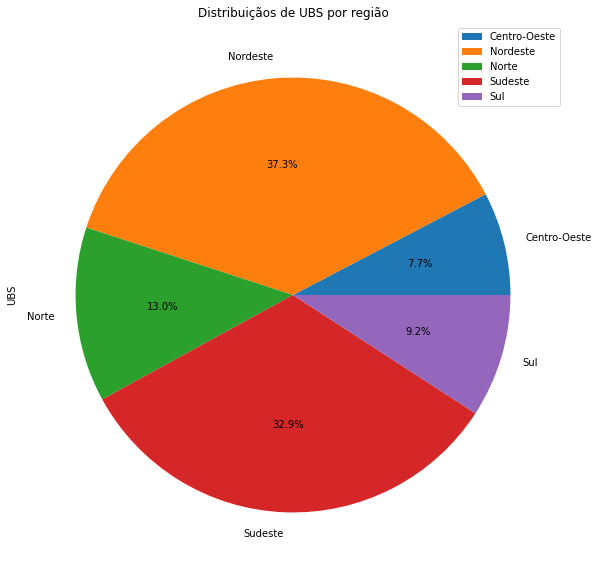

In [20]:
frame_final.groupby(['Região']).sum().plot(kind='pie',y='UBS',figsize=(15,10),autopct='%1.1f%%')
plt.title('Distribuiçãos de UBS por região')

Fazendo a mesma comparação por população:

Text(0.5, 1.0, 'Distribuiçãos da população por região')

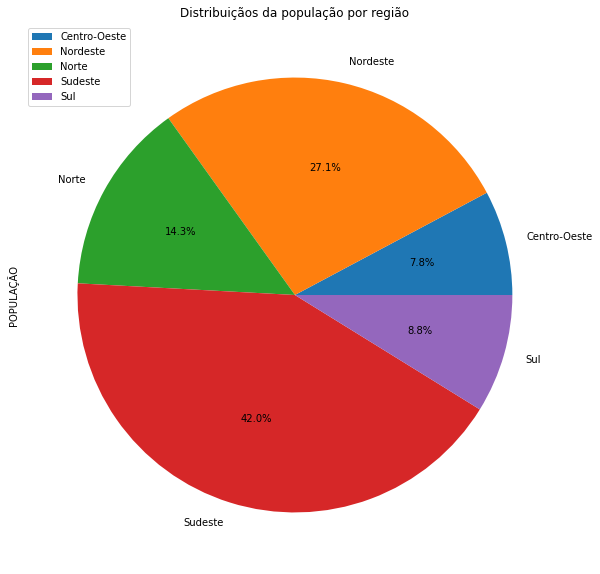

In [21]:
frame_final.groupby(['Região']).sum().plot(kind='pie',y='POPULAÇÃO',figsize=(15,10),autopct='%1.1f%%')
plt.title('Distribuiçãos da população por região')

In [22]:
ubs_por_pessoa = round(frame_final['POPULAÇÃO'].sum() / grupo_uf['UBS'].sum())
ubs_por_pessoa

5064

# Conclusões iniciais

### UBS, região e população.
Pelos gráficos observamos que as regiões com a maior quantidade de UBS são a nordeste e sudeste, que também possuem a maior porcentagem de habitantes. É interessante notar que quanto mais populoso uma região maior é a disponibilidade de UBS, assim como visto no primeiro gráfico de distribuição de UBS por estado, quanto mais populoso um estado, maior a sua disponibilidade de UBS, não á toa os estados de São Paulo, Minas Gerais e da Bahia concentrem a maior quantidade de UBS e de população, por fim, outro dado interessante seria que caso fosse feita uma distribuição de UBS por habitante, teríamos em média 1 UBS para atender 5064 pessoas.


# 6. Análise do FNS

### FNS e repasses
Como foi visto anteriormente, as UBS são ferramentas fundamentais para a população, sua grande presença em todo o território nacional reforça sua importância vital para assistência da saúde da população, porém as UBS são apenas umas das ferramentas do SUS, que são geridas pelo Fundo Nacional de Sáude(FNS), gestor financeiro dos recursos destinados a financiar despesas e de capital para o Ministério da Saúde, orgãos e entidades da administração direta e indireta e dos SUS. Nessa parte final do relatório, será estudada a relação dos repasses consolidados do FNS para os estados, os dados foram obtidos no site: https://consultafns.saude.gov.br/#/consolidada.

### Conversões de arquivos .pdf e biblioteca tabula
O maior desafio dessa parte do relatório se deveu ao fato do site apenas salvar a página em formato .pdf, o que foi necessário o uso da biblioteca tabula e demais manipulações manuais para obter seus resultados, o que demandou mais tempo pois cada arquivo tinha que ser lido página por página do arquivo .pdf, e nem todos apresentavem informações padronizadas, como demonstrado na imagem abaixo, para depois serem concatenadas um único dataframe, o que demandou mais tempo e atenção. Primeiramente será feita a análises dos repasses consolidados do ano de 2021 até julho.

<img src="files/imagem.JPG">
Demonstração de como os arquivos eram extraídos do site do FNS

Tratamento dos arquivos

In [23]:
#Leitura do arquvio pdf na página inicial, utilizando o indíce [0] e [1] para respectivas páginas
df_repasses_pdf_21_1 = tabula.read_pdf('fns.pdf', pages='all')[0]

#armazenando dados no dataframe df_gasto_21
df_repasses_21_1 = df_repasses_pdf_21_1

#exibindo o dataframe da primeira página
df_repasses_21_1

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,UF,Município,Entidade,CNPJ,Valor Total Bruto,Ações
1,DF,BRASILIA,EMPRESA BRASILEIRA DE SERVICOS HOSPITALARES - ...,15.126.437/0003-05,"R$ 16.543,21",NaN
2,MA,SAO LUIS,ESTADO DO MARANHAO - FUNDO ESTADUAL DE SAUDE /...,06.023.953/0001-51,"R$ 357.831.575,83",NaN
3,DF,BRASILIA,FUNDO DE SAUDE DO DISTRITO FEDERAL,12.116.247/0001-57,"R$ 575.961.434,51",NaN
4,PI,TERESINA,FUNDO DE SAUDE DO ESTADO DO PIAUI,06.206.659/0001-85,"R$ 186.073.688,63",NaN
5,MS,CAMPO GRANDE,FUNDO ESPECIAL DE SAUDE,03.517.102/0001-77,"R$ 132.082.726,46",NaN
6,MG,BELO HORIZONTE,FUNDO ESTADUAL DE SAUDE,03.133.408/0001-20,"R$ 510.839.816,75",NaN
7,PA,BELEM,FUNDO ESTADUAL DE SAUDE,83.369.835/0001-40,"R$ 369.318.065,65",NaN
8,RO,PORTO VELHO,FUNDO ESTADUAL DE SAUDE,00.733.062/0001-02,"R$ 197.604.373,54",NaN
9,RS,PORTO ALEGRE,FUNDO ESTADUAL DE SAUDE,87.182.846/0001-78,"R$ 851.823.216,28",NaN


In [24]:
#Realizando o mesmo procedimento na página 2 do pdf

df_repasses_pdf_21_2 = tabula.read_pdf('fns.pdf', pages='all')[1]

df_repasses_21_2 = df_repasses_pdf_21_2

df_repasses_21_2

,UF,Município,Entidade,CNPJ,Valor Total Bruto,Ações
0,AL,MACEIO,FUNDO ESTADUAL DE SAUDE,11.659.171/0001-43,"R$ 195.423.009,86",NaN
1,GO,GOIANIA,FUNDO ESTADUAL DE SAUDE,00.544.963/0001-56,"R$ 246.407.532,59",NaN
2,CE,FORTALEZA,FUNDO ESTADUAL DE SAUDE,74.031.865/0001-51,"R$ 528.018.623,82",NaN
3,SE,ARACAJU,FUNDO ESTADUAL DE SAUDE,04.384.829/0001-96,"R$ 232.923.392,87",NaN
4,ES,VITORIA,FUNDO ESTADUAL DE SAUDE - FES,06.893.466/0001-40,"R$ 564.136.107,23",NaN
5,AM,MANAUS,FUNDO ESTADUAL DE SAUDE - FES,06.023.708/0001-44,"R$ 366.795.343,60",NaN
6,AC,RIO BRANCO,FUNDO ESTADUAL DE SAUDE - FUNDES,07.458.465/0001-30,"R$ 161.108.307,08",NaN
7,SP,SAO PAULO,FUNDO ESTADUAL DE SAUDE - FUNDES,13.851.748/0001-40,"R$ 3.384.054.762,89",NaN
8,PE,RECIFE,FUNDO ESTADUAL DE SAUDE DE PERNAMBUCO,11.430.018/0001-40,"R$ 1.159.023.703,05",NaN
9,BA,SALVADOR,FUNDO ESTADUAL DE SAUDE DO ESTADO DA BAHIA,05.816.630/0001-52,"R$ 1.150.379.163,59",NaN


In [25]:
#Tratamento dos dados e concatenação dos dataframes

#Exclusão da coluna 'Ações'
df_repasses_21_1.drop("Unnamed: 5", axis=1, inplace=True)

#Exclusão das linhas 13 e 14 do primeiro dataframe
df_repasses_21_1.drop(labels=[13,14],axis=0, inplace=True)

#Mesmas ações para o dataframe 2

df_repasses_21_2.drop("Ações", axis=1, inplace=True)

df_repasses_21_2.drop(labels=[16],axis=0, inplace=True)

In [26]:
#Deixando os cabeçalhos dos dataframes iguais, usando um dicionário como argumento na função rename
dict = {
    'Unnamed: 0' : 'UF',
    'Unnamed: 1' : 'Município',
    'Unnamed: 2' : 'Entidade',
    'Unnamed: 3' : 'CNPJ',
    'Unnamed: 4' : 'Valor Total Bruto'
}
df_repasses_21_1.rename(columns=dict, inplace=True)

df_repasses_21_1.drop(labels=[0],axis=0, inplace=True)

In [27]:
#concatenando os frames
frames = [df_repasses_21_1, df_repasses_21_2]
df_repasses_totais_21 = pd.concat(frames)

In [28]:
#ajustando indíces
df_repasses_totais_21.reset_index(drop=True, inplace=True)

In [29]:
'''
Como os dados foram recebidos em reais, foi necessário ajustar sua formatação pois o Python reconhece apenas ponto
ao invés de vírgula para tratamento de valores de ponto flutuante, para isso a necessidade de alterar a moeda por meio de uma 
função customizada. 
'''
def formata_moeda(x):
    if isinstance(x, str):
        return(x.replace('R$ ','').replace('R$ ','').replace('.',''))
    return(x)

In [30]:
# Uso da função customizada para substituir ponto por vazio
df_repasses_totais_21['Valor Total Bruto'] = df_repasses_totais_21['Valor Total Bruto'].apply(formata_moeda)

In [31]:
# Uso da função replace para substituir vírgula por ponto
df_repasses_totais_21['Valor Total Bruto'] = df_repasses_totais_21['Valor Total Bruto'].str.replace(',','.')
df_repasses_totais_21

,UF,Município,Entidade,CNPJ,Valor Total Bruto
0,DF,BRASILIA,EMPRESA BRASILEIRA DE SERVICOS HOSPITALARES - ...,15.126.437/0003-05,16543.21
1,MA,SAO LUIS,ESTADO DO MARANHAO - FUNDO ESTADUAL DE SAUDE /...,06.023.953/0001-51,357831575.83
2,DF,BRASILIA,FUNDO DE SAUDE DO DISTRITO FEDERAL,12.116.247/0001-57,575961434.51
3,PI,TERESINA,FUNDO DE SAUDE DO ESTADO DO PIAUI,06.206.659/0001-85,186073688.63
4,MS,CAMPO GRANDE,FUNDO ESPECIAL DE SAUDE,03.517.102/0001-77,132082726.46
5,MG,BELO HORIZONTE,FUNDO ESTADUAL DE SAUDE,03.133.408/0001-20,510839816.75
6,PA,BELEM,FUNDO ESTADUAL DE SAUDE,83.369.835/0001-40,369318065.65
7,RO,PORTO VELHO,FUNDO ESTADUAL DE SAUDE,00.733.062/0001-02,197604373.54
8,RS,PORTO ALEGRE,FUNDO ESTADUAL DE SAUDE,87.182.846/0001-78,851823216.28
9,AP,MACAPA,FUNDO ESTADUAL DE SAUDE,06.023.582/0001-08,107370312.62


In [32]:
#Conversão dos valores da coluna 'Valor Total Bruto' de object para inteiro
df_repasses_totais_21['Valor Total Bruto'] = pd.to_numeric(df_repasses_totais_21['Valor Total Bruto'], downcast='integer')

In [33]:
'''
Convertendo a mesma coluna coluna agora para tipo int64 da biblioteca numpy para facilitar e trabalhar apenas com valores inteiros,
essa decisão foi puramente pessoal pois estava encontrando bastante dificuldade para trabalhar com precisão grandes valores.
'''
df_repasses_totais_21['Valor Total Bruto'] = df_repasses_totais_21['Valor Total Bruto'].astype(np.int64)
df_repasses_totais_21

,UF,Município,Entidade,CNPJ,Valor Total Bruto
0,DF,BRASILIA,EMPRESA BRASILEIRA DE SERVICOS HOSPITALARES - ...,15.126.437/0003-05,16543
1,MA,SAO LUIS,ESTADO DO MARANHAO - FUNDO ESTADUAL DE SAUDE /...,06.023.953/0001-51,357831575
2,DF,BRASILIA,FUNDO DE SAUDE DO DISTRITO FEDERAL,12.116.247/0001-57,575961434
3,PI,TERESINA,FUNDO DE SAUDE DO ESTADO DO PIAUI,06.206.659/0001-85,186073688
4,MS,CAMPO GRANDE,FUNDO ESPECIAL DE SAUDE,03.517.102/0001-77,132082726
5,MG,BELO HORIZONTE,FUNDO ESTADUAL DE SAUDE,03.133.408/0001-20,510839816
6,PA,BELEM,FUNDO ESTADUAL DE SAUDE,83.369.835/0001-40,369318065
7,RO,PORTO VELHO,FUNDO ESTADUAL DE SAUDE,00.733.062/0001-02,197604373
8,RS,PORTO ALEGRE,FUNDO ESTADUAL DE SAUDE,87.182.846/0001-78,851823216
9,AP,MACAPA,FUNDO ESTADUAL DE SAUDE,06.023.582/0001-08,107370312


Com a tabela preparada, podemos começar a fazer agrupamentos.

In [34]:
#repasses por UF
repasses_uf_21 = df_repasses_totais_21.groupby('UF')['Valor Total Bruto'].agg(Total='sum')
repasses_uf_21_desc = repasses_uf_21.sort_values(by='Total', ascending=False)
repasses_uf_21_desc

,Total
UF,
SP,3384054762
PE,1159023703
BA,1150379163
PR,946136914
RS,851823216
DF,575977977
ES,564136107
CE,528018623
RJ,527648621


Text(0.5, 1.0, 'Repasses em 2021(até Julho)')

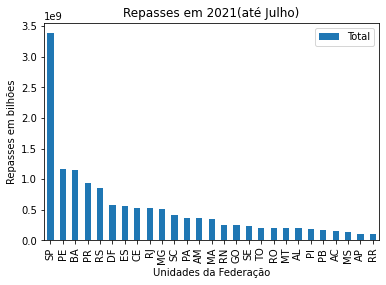

In [35]:
#Plotando o gráfico
repasses_uf_21_desc.plot.bar()
plt.xlabel('Unidades da Federação')
plt.ylabel('Repasses em bilhões')
plt.title('Repasses em 2021(até Julho)')

Em um primeiro momento, é possível notar que há uma grande discrepância entre os valores repassados para o estado de São Paulo em comparação com os demais estados, assim como foi sugerido durante a análise das UBS, isso pode se dar ao fato de ser o estado com a maior quantidade de habitantes, assim como o fator da pandemia da covid-19 pode ajudar a deixar esses números mais 'inchados' já que é uma doença que precisa de uma maior atenção e recursos para seu enfrentamento.

A variância da distribuição:

In [36]:
variancia = repasses_uf_21_desc.var()['Total']
variancia

4.185394422635792e+17

Média da distribuição é da ordem de aproximadamente 522 milhões

In [37]:
#média
media = round(repasses_uf_21_desc.mean()['Total'])
media

522450703

# 7. Estudo dos demais anos e comparativos

Como mencionado acima, a pandemia pode ter sido um grande fator para influenciar nos resultados apresentados, para analisar esse aspecto serão feitos os mesmos procedimentos, porém avaliando os últimos 5 anos, de 2016 até 2020.

In [38]:
#Realizando os mesmos procedimentos para o ano de 2020

#Leitura do arquvio pdf na página inicial
df_repasses_pdf_20_1 = tabula.read_pdf('fns20.pdf', pages='all')[2]

#armazenando dados no dataframe df_gasto_21
df_repasses_20_1 = df_repasses_pdf_20_1

#Leitura da terceira página do datafarame
df_repasses_pdf_20_2 = tabula.read_pdf('fns20.pdf', pages='all')[3]

df_repasses_20_2 = df_repasses_pdf_20_2

In [39]:
#Tratamento e concatenação

df_repasses_20_1.drop("Ações", axis=1, inplace=True)
df_repasses_20_1.drop(labels=[0,16,17],axis=0, inplace=True)

df_repasses_20_2.drop("Ações", axis=1, inplace=True)
df_repasses_20_2.drop(labels=[12],axis=0, inplace=True)

frames_20 = [df_repasses_20_1, df_repasses_20_2]
df_repasses_totais_20 = pd.concat(frames_20)

In [40]:
#ajustando indíces
df_repasses_totais_20.reset_index(drop=True, inplace=True)

Ajustando a coluna 'Valor Total Bruto'

In [41]:
df_repasses_totais_20['Valor Total Bruto'] = df_repasses_totais_20['Valor Total Bruto'].apply(formata_moeda)
df_repasses_totais_20['Valor Total Bruto'] = df_repasses_totais_20['Valor Total Bruto'].str.replace(',','.')
df_repasses_totais_20['Valor Total Bruto'] = pd.to_numeric(df_repasses_totais_20['Valor Total Bruto'], downcast='integer')
df_repasses_totais_20['Valor Total Bruto'] = df_repasses_totais_20['Valor Total Bruto'].astype(np.int64)

Fazendo as comparações de repasses por UF

Text(0.5, 1.0, 'Repasses consolidados em 2020')

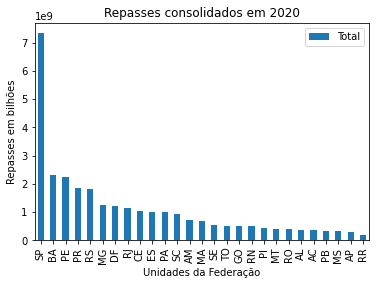

In [42]:
repasses_uf_20 = df_repasses_totais_20.groupby('UF')['Valor Total Bruto'].agg(Total='sum')
repasses_uf_20_desc = repasses_uf_20.sort_values(by='Total', ascending=False)

repasses_uf_20_desc.plot.bar()
plt.xlabel('Unidades da Federação')
plt.ylabel('Repasses em bilhões')
plt.title('Repasses consolidados em 2020')

### Para o ano de 2019

Leitura do arquivo.

In [43]:
df_repasses_pdf_19_1 = tabula.read_pdf('fns19.pdf', pages='all')[2]
df_repasses_19_1 = df_repasses_pdf_19_1

Exclusão de linhas e colunas não utilizadas.

In [44]:
df_repasses_19_1.drop("Ações", axis=1, inplace=True)
df_repasses_19_1.drop(labels=[15,28,29,30,31],axis=0, inplace=True)
df_repasses_totais_19 = df_repasses_19_1

Reiniciando indíces e tratamento da coluna 'Valor Total Bruto'.

In [45]:
df_repasses_totais_19.reset_index(drop=True, inplace=True)
df_repasses_totais_19['Valor Total Bruto'] = df_repasses_totais_19['Valor Total Bruto'].apply(formata_moeda)
df_repasses_totais_19['Valor Total Bruto'] = df_repasses_totais_19['Valor Total Bruto'].str.replace(',','.')
df_repasses_totais_19['Valor Total Bruto'] = pd.to_numeric(df_repasses_totais_19['Valor Total Bruto'], downcast='integer')
df_repasses_totais_19['Valor Total Bruto'] = df_repasses_totais_19['Valor Total Bruto'].astype(np.int64)

Agrupamento e plotagem do gráfico de valores repassados por UF.

Text(0.5, 1.0, 'Repasses consolidados em 2019')

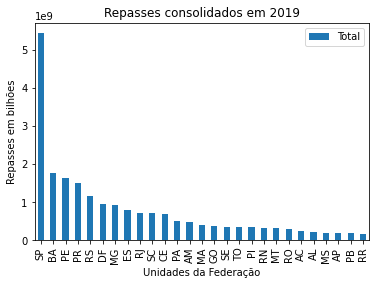

In [46]:
repasses_uf_19 = df_repasses_totais_19.groupby('UF')['Valor Total Bruto'].agg(Total='sum')
repasses_uf_19_desc = repasses_uf_19.sort_values(by='Total', ascending=False)

repasses_uf_19_desc.plot.bar()
plt.xlabel('Unidades da Federação')
plt.ylabel('Repasses em bilhões')
plt.title('Repasses consolidados em 2019')

### Para o ano de 2018

In [47]:
df_repasses_pdf_18_1 = tabula.read_pdf('fns18.pdf', pages='all')[2]
df_repasses_18_1 = df_repasses_pdf_18_1

In [48]:
df_repasses_18_1.drop("Ações", axis=1, inplace=True)
df_repasses_18_1.drop(labels=[27],axis=0, inplace=True)

df_repasses_totais_18 = df_repasses_18_1

In [49]:
df_repasses_totais_18['Valor Total Bruto'] = df_repasses_totais_18['Valor Total Bruto'].apply(formata_moeda)
df_repasses_totais_18['Valor Total Bruto'] = df_repasses_totais_18['Valor Total Bruto'].str.replace(',','.')
df_repasses_totais_18['Valor Total Bruto'] = pd.to_numeric(df_repasses_totais_18['Valor Total Bruto'], downcast='integer')
df_repasses_totais_18['Valor Total Bruto'] = df_repasses_totais_18['Valor Total Bruto'].astype(np.int64)

Text(0.5, 1.0, 'Repasses consolidados em 2018')

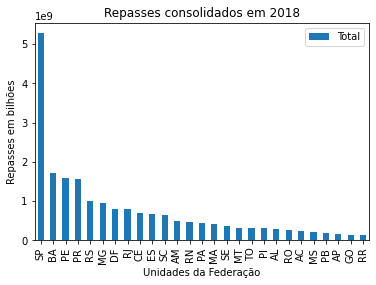

In [50]:
repasses_uf_18 = df_repasses_totais_18.groupby('UF')['Valor Total Bruto'].agg(Total='sum')
repasses_uf_18_desc = repasses_uf_18.sort_values(by='Total', ascending=False)

repasses_uf_18_desc.plot.bar()
plt.xlabel('Unidades da Federação')
plt.ylabel('Repasses em bilhões')
plt.title('Repasses consolidados em 2018')

### Para o ano de 2017

In [51]:
#Leitura
df_repasses_pdf_17_1 = tabula.read_pdf('fns17.pdf', pages='all')[1]
df_repasses_17_1 = df_repasses_pdf_17_1

df_repasses_pdf_17_2 = tabula.read_pdf('fns17.pdf', pages='all')[2]
df_repasses_17_2 = df_repasses_pdf_17_2

In [52]:
#Tratamento
df_repasses_17_1.drop("Ações", axis=1, inplace=True)
df_repasses_17_1.drop(labels=[17,18],axis=0, inplace=True)

df_repasses_17_2.drop("Ações", axis=1, inplace=True)
df_repasses_17_2.drop(labels=[6],axis=0, inplace=True)

frames_17 = [df_repasses_17_1, df_repasses_17_2]
df_repasses_totais_17 = pd.concat(frames_17)

Por questões de formatação do arquivo .pdf original, as informações do Maranhão, Distrito Federal, Piauí e Mato Grosso do Sul foram inserido manualmente.

In [53]:
#criando dataframe para ser inserido manualmente
adicional = [('MA','SAO LUIS','ESTADO DO MARANHAO - FUNDO ESTADUAL DE SAUDE / FES ','06.023.953/0001-51','R$ 417.154.591,07'),
               ('DF','BRASILIA','FUNDO DE SAUDE DO DISTRITO FEDERAL','12.116.247/0001-57','R$ 703.830.201,74'),
               ('PI','TERESINA','FUNDO DE SAUDE DO ESTADO DO PIAUI','06.206.659/0001-85','R$ 238.547.236,58'),
               ('MS','CAMPO GRANDE','FUNDO ESPECIAL DE SAUDE','03.517.102/0001-77','R$ 132.216.016,20')]

#criando índice do dataframe
df_adicional = pd.DataFrame(adicional,columns = ['UF','Município','Entidade','CNPJ','Valor Total Bruto'])

#juntando os dataframes
df_repasses_totais_2017 = df_repasses_totais_17.append(df_adicional,ignore_index=True)

In [54]:
df_repasses_totais_2017

,UF,Município,Entidade,CNPJ,Valor Total Bruto
0,MG,BELO HORIZONTE,FUNDO ESTADUAL DE SAUDE,03.133.408/0001-\r20,"R$ 1.066.752.079,90"
1,PA,BELEM,FUNDO ESTADUAL DE SAUDE,83.369.835/0001-\r40,"R$ 397.172.662,03"
2,RO,PORTO VELHO,FUNDO ESTADUAL DE SAUDE,00.733.062/0001-\r02,"R$ 243.643.116,57"
3,RS,PORTO ALEGRE,FUNDO ESTADUAL DE SAUDE,87.182.846/0001-\r78,"R$ 884.784.335,82"
4,AP,MACAPA,FUNDO ESTADUAL DE SAUDE,06.023.582/0001-\r08,"R$ 127.217.672,32"
5,SC,FLORIANOPOLIS,FUNDO ESTADUAL DE SAUDE,80.673.411/0001-\r87,"R$ 512.467.775,03"
6,MT,CUIABA,FUNDO ESTADUAL DE SAUDE,04.441.389/0001-\r61,"R$ 213.986.578,26"
7,AL,MACEIO,FUNDO ESTADUAL DE SAUDE,11.659.171/0001-\r43,"R$ 233.833.821,93"
8,GO,GOIANIA,FUNDO ESTADUAL DE SAUDE,00.544.963/0001-\r56,"R$ 103.203.271,26"
9,CE,FORTALEZA,FUNDO ESTADUAL DE SAUDE,74.031.865/0001-\r51,"R$ 446.499.768,22"


In [55]:
#ajustando indíces
df_repasses_totais_2017.reset_index(drop=True, inplace=True)

In [56]:
df_repasses_totais_2017['Valor Total Bruto'] = df_repasses_totais_2017['Valor Total Bruto'].apply(formata_moeda)
df_repasses_totais_2017['Valor Total Bruto'] = df_repasses_totais_2017['Valor Total Bruto'].str.replace(',','.')
df_repasses_totais_2017['Valor Total Bruto'] = pd.to_numeric(df_repasses_totais_2017['Valor Total Bruto'], downcast='integer')
df_repasses_totais_2017['Valor Total Bruto'] = df_repasses_totais_2017['Valor Total Bruto'].astype(np.int64)

Repasses por UF

Text(0.5, 1.0, 'Repasses consolidados em 2017')

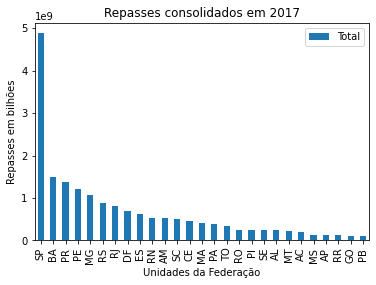

In [57]:
repasses_uf_17 = df_repasses_totais_2017.groupby('UF')['Valor Total Bruto'].agg(Total='sum')
repasses_uf_17_desc = repasses_uf_17.sort_values(by='Total', ascending=False)

repasses_uf_17_desc.plot.bar()
plt.xlabel('Unidades da Federação')
plt.ylabel('Repasses em bilhões')
plt.title('Repasses consolidados em 2017')

### Ano 2016

In [58]:
df_repasses_pdf_16_1 = tabula.read_pdf('fns16.pdf', pages='all')[1]
df_repasses_16_1 = df_repasses_pdf_16_1

In [59]:
df_repasses_16_1.drop("Ações", axis=1, inplace=True)
df_repasses_16_1.drop(labels=[18,19],axis=0, inplace=True)

df_repasses_totais_16 = df_repasses_16_1

Novamente devido a formatação original do arquivo será feito a adição manual dos dataframes não obtidos pela leitura do arquivo.

In [60]:
adicional_1 = [('MA','SAO LUIS','ESTADO DO MARANHAO - FUNDO ESTADUAL DE SAUDE / FES ','06.023.953/0001-51','R$ 409.466.522,72'),
               ('DF','BRASILIA','FUNDO DE SAUDE DO DISTRITO FEDERAL','12.116.247/0001-57','R$ 724.525.039,90'),
               ('PI','TERESINA','FUNDO DE SAUDE DO ESTADO DO PIAUI','06.206.659/0001-85','R$ 252.833.976,39'),
               ('MS','CAMPO GRANDE','FUNDO ESPECIAL DE SAUDE','03.517.102/0001-77','R$ 164.654.130,04'),
               ('MG','BELO HORIZONTE','FUNDO ESTADUAL DE SAUDE','03.133.408/0001-20','R$ 1.194.519.989,17'),
               ('PA','BELEM','FUNDO ESTADUAL DE SAUDE','83.369.835/0001-40','R$ 334.047.448,72'),
               ('RO','PORTO VELHO','FUNDO ESTADUAL DE SAUDE','00.733.062/0001-02','R$ 236.076.046,32'),
               ('RS','PORTO ALEGRE','FUNDO ESTADUAL DE SAUDE','87.182.846/0001-78','R$ 878.739.316,25'),
               ('AP','MACAPA','FUNDO ESTADUAL DE SAUDE','06.023.582/0001-08','R$ 127.309.913,75')]

df_adicional_1 = pd.DataFrame(adicional_1,columns = ['UF','Município','Entidade','CNPJ','Valor Total Bruto'])

In [61]:
df_repasses_totais_2016 = df_repasses_totais_16.append(df_adicional_1,ignore_index=True)

In [62]:
df_repasses_totais_2016.reset_index(drop=True, inplace=True)

In [63]:
df_repasses_totais_2016['Valor Total Bruto'] = df_repasses_totais_2016['Valor Total Bruto'].apply(formata_moeda)
df_repasses_totais_2016['Valor Total Bruto'] = df_repasses_totais_2016['Valor Total Bruto'].str.replace(',','.')
df_repasses_totais_2016['Valor Total Bruto'] = pd.to_numeric(df_repasses_totais_2016['Valor Total Bruto'], downcast='integer')
df_repasses_totais_2016['Valor Total Bruto'] = df_repasses_totais_2016['Valor Total Bruto'].astype(np.int64)

Repasses por UF

Text(0.5, 1.0, 'Repasses consolidados em 2016')

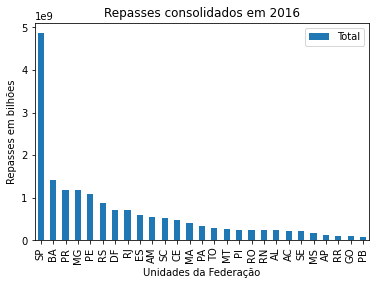

In [64]:
repasses_uf_16 = df_repasses_totais_2016.groupby('UF')['Valor Total Bruto'].agg(Total='sum')
repasses_uf_16_desc = repasses_uf_16.sort_values(by='Total', ascending=False)

repasses_uf_16_desc.plot.bar()
plt.xlabel('Unidades da Federação')
plt.ylabel('Repasses em bilhões')
plt.title('Repasses consolidados em 2016')

Fazendo uma análise de repasses nos últimos 5 anos nos estados de São Paulo e da Bahia, pois são os que receberam mais repasses.

Text(0.5, 1.0, 'Histórico de repasses nos últimos 5 anos do estado de São Paulo e da Bahia')

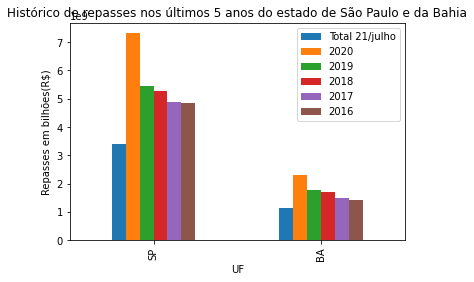

In [65]:
#criando um frame com os dados dos repasses de SP e BA
f = [repasses_uf_21.loc[['SP','BA'],:],repasses_uf_20.loc[['SP','BA'],:],
    repasses_uf_19.loc[['SP','BA'],:],repasses_uf_18.loc[['SP','BA'],:],
    repasses_uf_17.loc[['SP','BA'],:],repasses_uf_16.loc[['SP','BA'],:]]

#concatenando-os
repasses_comp = pd.concat(f,axis=1,names=['1','1','2','3','4','5','6','7'])

#renomeando as colunas
repasses_comp.columns = ['Total 21/julho', '2020','2019','2018','2017','2016']

#plotando o gráfico
repasses_comp.plot.bar()
plt.ylabel('Repasses em bilhões(R$)')
plt.title('Histórico de repasses nos últimos 5 anos do estado de São Paulo e da Bahia')

# 8. Conclusões Finais
Com esse relatório foi possível tirar algumas conclusões e análises de alguns aspectos da saúde no Brasil. A primeira delas em relação às UBS são de que estão com forte presença em todos os estados, principalmente aqueles mais populosos como São Paulo e Minas Gerais, assim como nas regiões nordeste e sudeste que são as mais populosas do país, em um esforço para prestar assistência ao máximo possível de habitantes.

Na parte final desse relatório foi vista a distribuição de repasses do FNS, assim como na distribuição de UBS, os valores repassados também estão relacionados com os estados mais populosos, um dos motivos seria novamente a quantidade de habitantes, outro fator interessado interessante foi o crescimento rápido dos 2 últimos anos em valores repasses, sendo o principal motivo a pandemia da covid-19.
